# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

In [4]:
##Setup code to load in the dataset 
import numpy as np
from matplotlib import pyplot as plt 

file = open('data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]      # ['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material' 'Length' 'Width' 'Height' 'image']
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
# puts the values from each heading in a list: 
begindate = dataset[:,2] = [int(x) for x in dataset[:,2]]    
length = dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]   
width = dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]   
height = dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]   
material = dataset[:,5] = [x.replace(";","->").split("->")[0] for x in dataset[:,5]]  
images = dataset[:,9]   
category = dataset[:,4] = [x.replace(";","->").split("->")[0] for x in dataset[:,4]]  
group = dataset[:,3] = [x.replace(";","->").split("->")[0] for x in dataset[:,3]]
objects=dataset[:,1] = [x.replace(";","->").split("->")[0] for x in dataset[:,1]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Oldest
    
    - Newest 
        
**You will have to do some extra research to find out how to display images in a Jupyter notebook**

In [5]:
# QUESTION 1 SOLUTION

#using numpy function min & max that returns the min and max value in an array 
oldest = np.min(begindate)
newest = np.max(begindate)

#getting all the indexes for the year of min and max and putting them in variables
oldest_image_index = np.where(begindate == oldest)[0]   #here's two 
newest_image_index = np.where(begindate == newest)[0]   #here's one

#printing the url's to the screen. bit clumsy, but who cares because it's working
print(images[oldest_image_index])
print(images[newest_image_index])

['http://source.techno-science.ca/artifacts-artefacts/images/1980.0657.001.aa.cs.png'
 'http://source.techno-science.ca/artifacts-artefacts/images/1980.0679.001.aa.cs.png']
['http://source.techno-science.ca/artifacts-artefacts/images/1966.0719.001.aa.cs.png']


These are the oldest images from year 1101 :


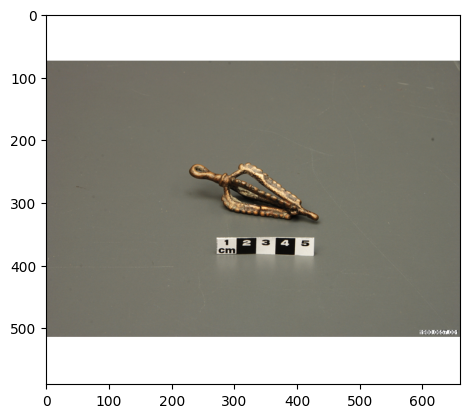

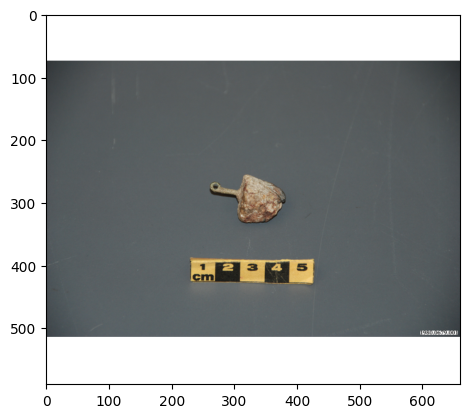

This is the newest image from year 1990 :


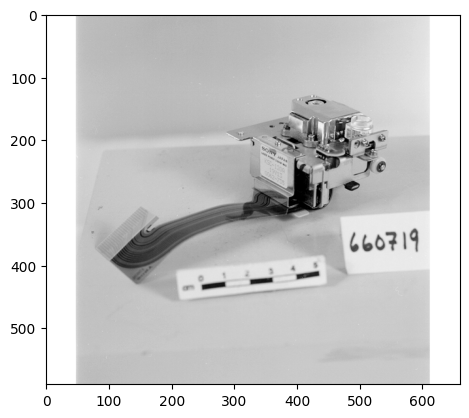

In [6]:
# QUESTION 1 SOLUTION CONTINUED

#displaying pictures | I wrote this function after looking at the following page on StackOverflow: https://stackoverflow.com/questions/49092390/displaying-getting-images-from-an-url-in-python
from PIL import Image
import requests 
def show_image(url):
    response = requests.get(url, stream=True)
    img = Image.open(response.raw)
    plt.imshow(img)
    plt.show()

print('These are the oldest images from year', oldest,':')
show_image('http://source.techno-science.ca/artifacts-artefacts/images/1980.0657.001.aa.cs.png')
show_image('http://source.techno-science.ca/artifacts-artefacts/images/1980.0679.001.aa.cs.png')
print('This is the newest image from year',newest,':')
show_image('http://source.techno-science.ca/artifacts-artefacts/images/1966.0719.001.aa.cs.png')

### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Remove the **top and bottom 20%** (e.g. the biggest and smallest objects)


3. Plot a histogram of the remaining object's volumes. Label the axes appropriately.



# QUESTION 2 SOLUTION

In [7]:
import math

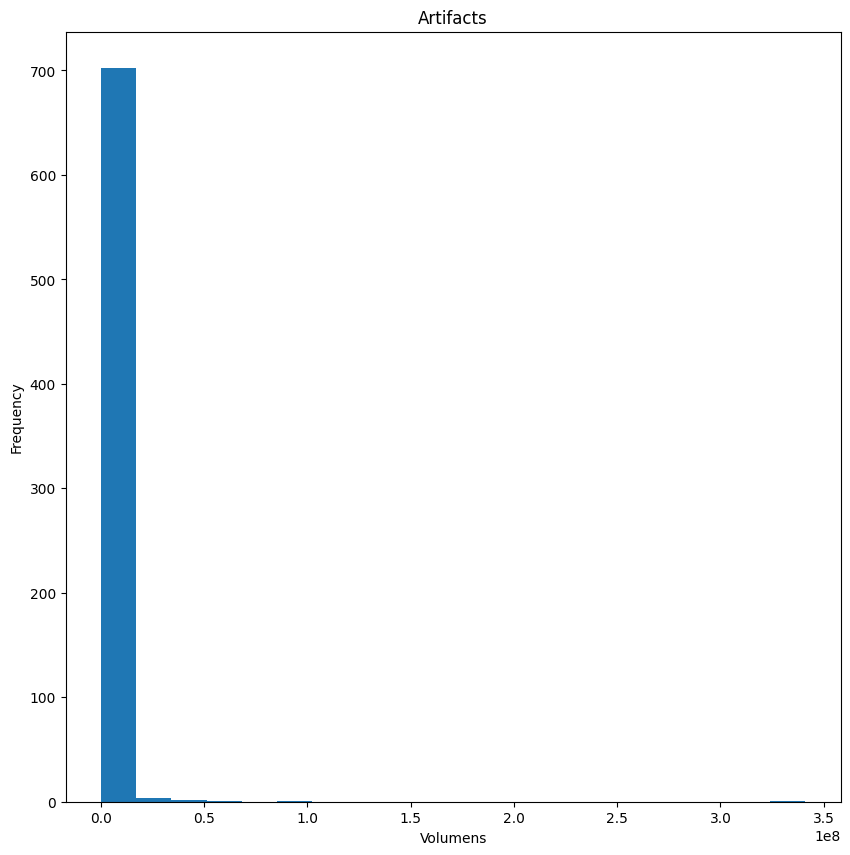

In [71]:
# QUESTION 2 SOLUTION 

from array import array

#calculating the volumens for each object and putting in array
volumens =np.array([(h * l * w ) for h,l,w in zip(height,length,width)])

#calculates 20% of the array
percentage = int(len(volumens)/100*20)

#removing the 20% of the largest and smallest objects
removed = np.sort(volumens[int(0.2*len(volumens)):int(0.8*len(volumens))] )  

fig, ax = plt.subplots(figsize =(10,10))

""" Something is wrong with the bins, meaning that the data doesn't plot nicely, but it is still distributed if you look closely :)"""

ax.hist(removed, bins = 20) 

plt.title('Artifacts')
plt.xlabel('Volumens')
plt.ylabel('Frequency')
plt.show()


### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

category_common = 

In [22]:
# QUESTION 3 SOLUTION

import collections 

# converts lists to arrays
category = np.array(category)
group = np.array(group)

# creating counterObject to count in array 'category' and return THE most common
category_counterObject = collections.Counter(category)
category_common = category_counterObject.most_common(1) 

# creating counterObject to count array 'group' and return THE most common
group_counterOjbect = collections.Counter(group)
group_common = group_counterOjbect.most_common(1)

# function that takes arguments array and list and returns the percentage 
def percentage(arr1,arr2):
    total_items = len(arr1)   #the number of total items
    length = arr2[0][1]      # the number of objects of a given column
    percentage = length/total_items*100  # calculates the percentage
    return percentage

print('The most common category is', category_common[0][0],'and there is',category_common[0][1],'of them','\n')
print('The most common group is',group_common[0][0],'and there is',group_common[0][1],'of them','\n')
print('Percentage of the most common categories of the total items: ',percentage(volumens,category_common),'\n')
print('Percentage of the most common groups of the total items: ',percentage(volumens,group_common),'\n')

The most common category is Still cameras and there is 695 of them 

The most common group is Technology and there is 2914 of them 

Percentage of the most common categories of the total items:  10.31463342238053 

Percentage of the most common groups of the total items:  43.247254378153755 



### Question 4

1. Plot date of objects against width from everything added to the collection between 1850 and 1900. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its material as described by the ``material`` heading .**EXTRA BONUS** If you can put in a legend mapping material to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


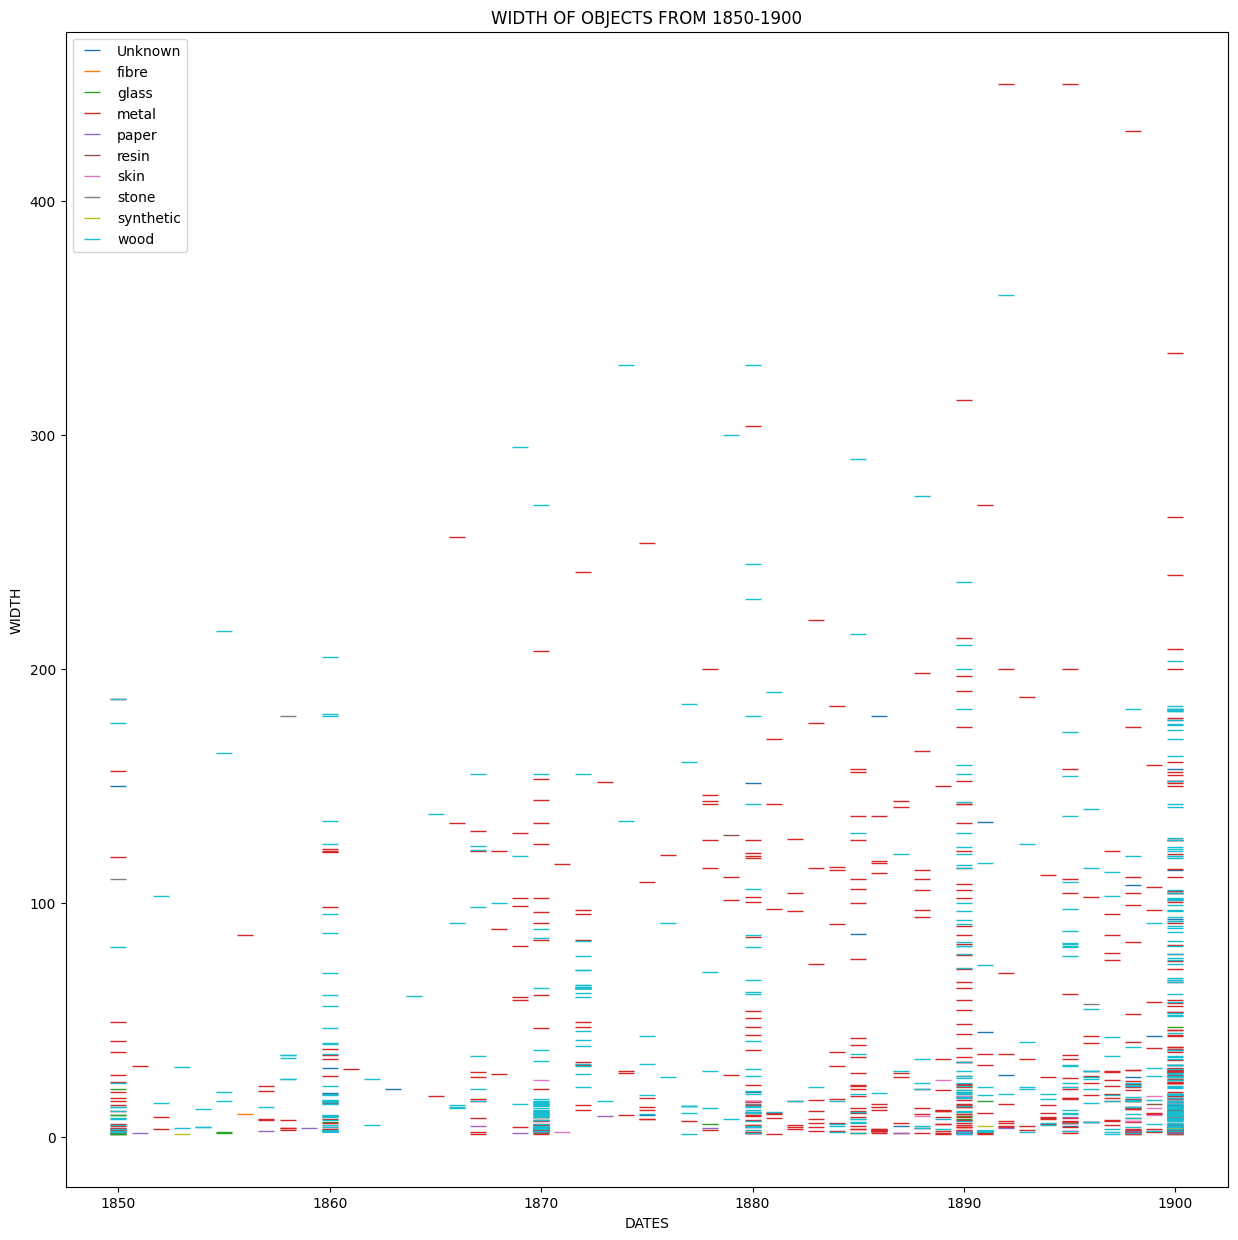

In [ ]:
# QUESTION 4.1 SOLUTION

import pandas as pd

# filtering the dataset to contain the objects from 1850-1900 
begindate_stripped = np.array([x for x in dataset if (x[2] >= 1850) and (x[2] <= 1900)])

# filtering the columns 
dates= begindate_stripped[:,2]
material = begindate_stripped[:,5]
width = begindate_stripped[:,8]

fig, ax = plt.subplots(figsize=(15,15))

#creates a dataframe from the filtered columns
df = pd.DataFrame(dict(dates=dates,width=width,material=material))

#groups by material using pandas function groupby
material_grouped=df.groupby('material')

# plot for each group
for name, group in material_grouped:
    ax.plot(group.dates,group.width, marker='_', linestyle='', ms=12, label=name)

#creates varibales for handles and labels
handles,labels=[],[]

#put data in handles and labels
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels,loc='upper left')
plt.xlabel('DATES')
plt.ylabel('WIDTH')
plt.title('WIDTH OF OBJECTS FROM 1850-1900')
plt.show()


QUESTION 4.2 SOLUTION

To have a look at the change over time in terms of material and size of objects, I have plottet the dates against the width.

First noticeable thing is how the blue and the red colour stands out on the x-axis, indicating that metal and wood are some of the most consistent materials over time. These two are also the most diverse materials in terms of width, which suggests that they are being used in production of a variety of objects. Paper and surprisingly skin are less used materials, but both equally consistent in terms of years in produciton.

Materials like stone, fibre and synthetics is mostly used before 1890, which indicates a historical shift in production methods. 

The plot also shows how the bigger the objects is, the less likely it becomes that materials like paper, synthetics, glass and skin has been used, whereas metal and wood is used for all kind of object, as they scatter all over the graph. 

The bigger the width - and I'm assuming thereby the volumen - the smaller is the variety of materials. Except from wood and metal, stone and resin are the only materials used for objects with a width that's over a 100 (+ a few unknown). Those kind of materials are latest seen at around 1857 and 1879, which implies that the use of wood and expecially metal increased over the years, while others decreased. 
The width also gets bigger in relation to the years, which implies that the engineering for building bigger and bigger got more advanced with time. 